In [1]:
%matplotlib inline
import scipy.linalg as splin
import numpy as np
import matplotlib.pyplot as plt
import itertools
from matplotlib import rc
rc('text',usetex = True)
import scipy.linalg as splin
import cmath

In [2]:
def plotProjections(data, projections, colorCoding, imCol = [], emphPoints=[], emphColors='black', cmap='plasma', gridsize = 4):
    xsize = 4
    ysize = 4
    figs, axs = plt.subplots(nrows = gridsize, ncols = gridsize, figsize=(4*xsize,4*ysize))
    figs.suptitle('1 Spin Manifold', fontsize=20)
    CLIST = np.array([data[i][colorCoding] for i in range(len(data))])
    for row in range(gridsize):
        for col in range(gridsize):
            if col >= row:
                if col == row:
                    sortIndex = row+2
                else:
                    sortIndex = row+1
                py = projections[:,row]
                px = projections[:,col+1]
                sorting = projections[:,sortIndex].argsort()
                
                clist = CLIST[sorting]
                PX = px[sorting]
                PY = py[sorting]
                
                rangeX = PX.max() - PX.min()
                centerX = (PX.max() + PX.min())/2.0
                rangeY = PY.max() - PY.min()
                centerY = (PY.max() + PY.min())/2.0
                axesDist = 0.6*max(rangeX,rangeY)
                
                sc1 = axs[row,col].scatter(PX,PY,alpha=0.7,c=clist,cmap=cmap)
                sc2 = axs[row,col].scatter(px[emphPoints],py[emphPoints],c=emphColors,s=100)
                
                subTitle = " "
                
                if (row in imCol):
                    subTitle += r" \textbf{"+str(row + 1)+"}   vs.   "
                else:
                    subTitle += r" \textit{"+str(row + 1)+"}   vs.   "
                if (col + 1 in imCol):
                    subTitle += r"\textbf{" +str(col + 2) + "}"
                else:
                    subTitle += r"\textit{" +str(col + 2) + "}"
                
                axs[row,col].set_title(subTitle)
                axs[row,col].set_xlim([centerX - axesDist, centerX + axesDist])
                axs[row,col].set_ylim([centerY - axesDist, centerY + axesDist])
                axs[row,col].ticklabel_format(style='sci', scilimits=(-2,2),axis='both')
            else:
                axs[row,col].axis('off')
    cbar_ax = figs.add_axes([0.95,0.15,0.01,0.7])
    cbar_ax.title.set_text(colorCoding)
    figs.colorbar(sc1,cax=cbar_ax,cmap=cmap)
    #plt.tight_layout()
    plt.show()

In [3]:
def DDT(theta,n):
    ddt = np.array([[(np.cos(theta1-theta2)**n)/n for theta1 in theta] for theta2 in theta])
    sums = [sum(row)/len(theta) for row in ddt]
    sumsums = sum(sums)/len(theta)
    return np.array([[ddt[i][j] - sums[i] - sums[j] + sumsums for i in range(len(theta))] for j in range(len(theta))])
def DDTlogs(theta,n):
    ddt = np.array([[np.log(np.cos(theta1-theta2)) for theta1 in theta] for theta2 in theta])
    sums = [sum(row)/len(theta) for row in ddt]
    sumsums = sum(sums)/len(theta)
    return np.array([[ddt[i][j] - sums[i] - sums[j] + sumsums for i in range(len(theta))] for j in range(len(theta))])

In [4]:
def PCA(theta,n,eigs=3,func=DDT,all=False):
    size = len(theta)
    ddt = func(theta,n)
    if all:
        W,V = np.linalg.eig(ddt)
    else:
        w,v = splin.eigh(ddt,eigvals=(size-1-eigs,size-1))
        wi,vi = splin.eigh(ddt,eigvals=(0,eigs))
        W = np.concatenate((w,wi))
        V = np.concatenate((v,vi), axis = 1)
    sorting = [abs(W).argsort()[-i] for i in range(1,len(W)+1)]
    W = W[sorting]
    V = np.array([point[sorting] for point in V])
    return(W,V)

In [5]:
def FIM(theta):
    c = np.cos(theta)
    s = np.sin(theta)
    return c * s * (c + s)

In [6]:
theta = np.linspace(0.0,np.pi/2.0,1000)
data = [{'theta':theta1} for theta1 in theta]

/home/katherine/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


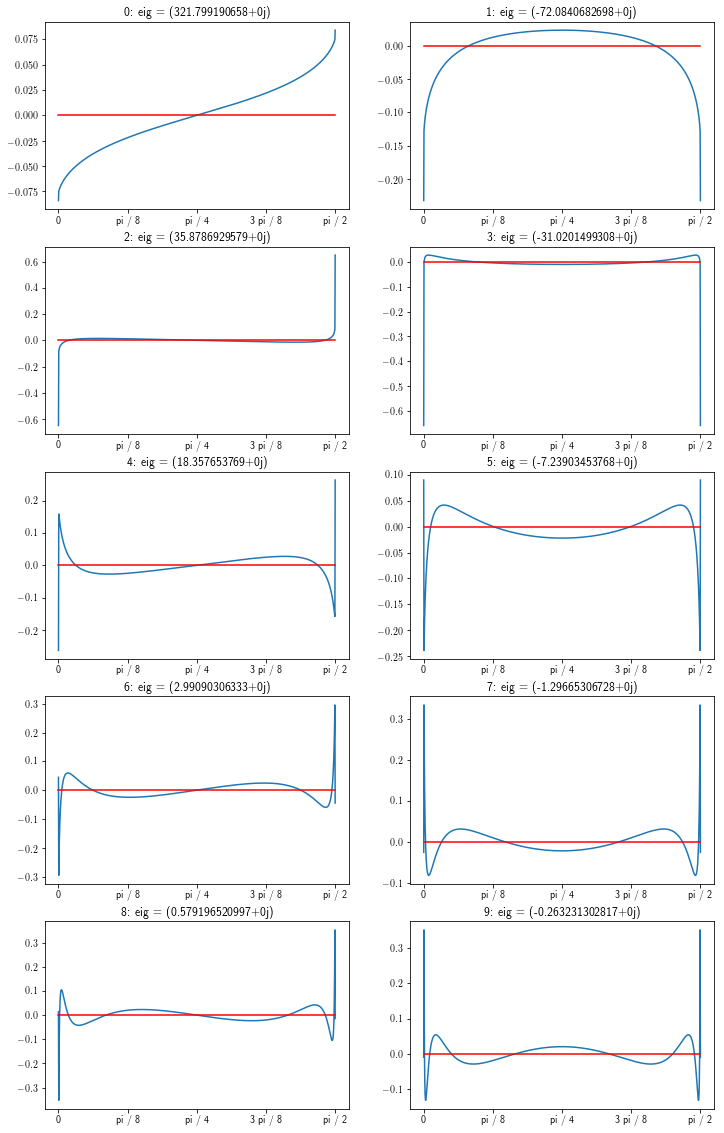

In [7]:
n = 1
eigs = 5
w,v = PCA(theta,n,eigs=eigs,func=DDTlogs,all=True)
eigstart = 0
eigend = 10
pos = 0
for i in range(eigstart,eigend):
    if w[i] > 0.0:
        pos += 1
cols = 2
rows = max(pos,eigend-eigstart-pos)
gridsize = 4
figs,axs = plt.subplots(nrows = rows, ncols = cols, figsize=(cols * 1.5*gridsize, rows * gridsize))
pos = 0
neg = 0
px = [0.0,np.pi/2.0]
xt = [0.0, np.pi/8.0, np.pi/4.0, 3.0*np.pi/8, np.pi/2.0]
xlab = ["0", "pi / 8", "pi / 4","3 pi / 8", "pi / 2"]
for i in range(eigstart,eigend):
    if w[i] > 0.0:
        axs[pos,0].plot(theta,v[:,i])
        axs[pos,0].plot(px,[0,0],c='red')
        axs[pos,0].set_title(str(i) + ': eig = '+str(w[i]))
        axs[pos,0].set_xticks(xt)
        axs[pos,0].set_xticklabels(xlab)
        pos += 1
    else:
        axs[neg,1].plot(theta,v[:,i])
        axs[neg,1].plot(px,[0,0],c='red')
        axs[neg,1].set_title(str(i) + ': eig = '+str(w[i]))
        axs[neg,1].set_xticks(xt)
        axs[neg,1].set_xticklabels(xlab)
        neg += 1
for i in range(pos,rows):
    axs[i,0].axis('off')
for i in range(neg,rows):
    axs[i,1].axis('off')
plt.show()

In [8]:
def dist(proj,theta,start,end,fimArry):
    g2 = [0.0]
    e2 = [0.0]
    for i in range(start,end-1):
        dtheta = theta[i+1] - theta[i]
        dpoint = proj[i+1] - proj[i]
        g2.extend([g2[-1] + np.sqrt(fimArry[i] * dtheta**2)/2])
        e2.extend([e2[-1] + np.sqrt(np.dot(dpoint,dpoint).real)])
    return [g2,e2]

def distParts(proj,theta,start,end,fimArry):
    g2 = []
    e2 = []
    eR2 = []
    eI2 = []
    for i in range(start,end-1):
        dtheta = theta[i+1] - theta[i]
        dpoint = proj[i+1] - proj[i]
        g2.extend([fimArry[i] * dtheta**2])
        e2.extend([np.dot(dpoint,dpoint).real])
        eR2.extend([np.dot(dpoint.real,dpoint.real)])
        eI2.extend([np.dot(dpoint.imag,dpoint.imag)])
    return [g2,e2,eR2,eI2]

In [9]:
fimArry = FIM(theta)

In [10]:
n = 0.5
eigs = 4
w,v = PCA(theta,n,eigs=eigs,func=DDTlogs,all=True)

In [11]:
proj = np.dot(v,np.diag(np.sqrt(np.abs(w))))

In [12]:
imCol = []
for i in range(len(w)):
    if w[i] < 0:
        imCol.append(i)

/home/katherine/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:583: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
/home/katherine/anaconda3/lib/python3.5/site-packages/matplotlib/transforms.py:989: ComplexWarning: Casting complex values to real discards the imaginary part
  self._points[:, 0] = interval
/home/katherine/anaconda3/lib/python3.5/site-packages/matplotlib/transforms.py:994: ComplexWarning: Casting complex values to real discards the imaginary part
  self._points[:, 1] = interval
/home/katherine/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:583: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
/home/katherine/anaconda3/lib/python3.5/site-packages/numpy/core/numeric.py:583: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, c

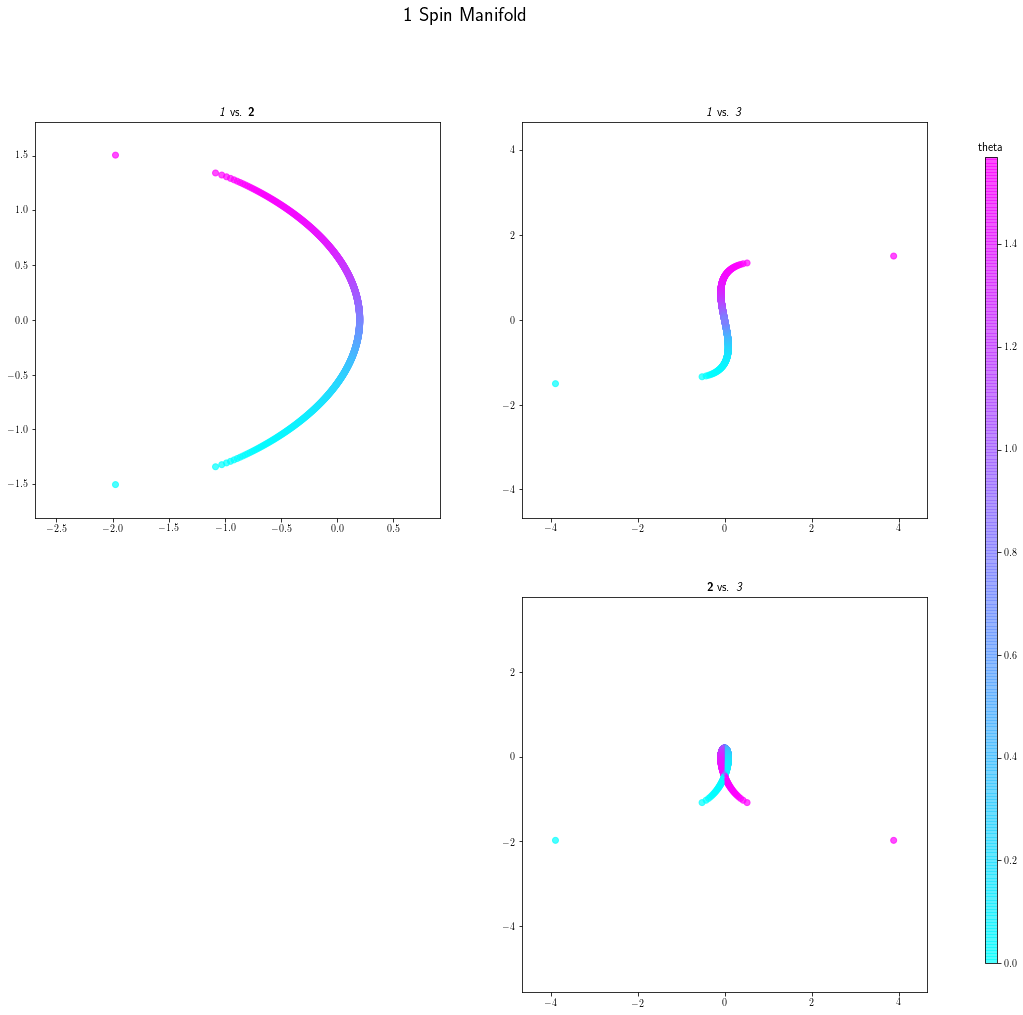

In [13]:
plotProjections(data,proj,'theta',imCol = imCol,gridsize=2,cmap='cool')

In [14]:
projComplex = [cmath.sqrt(lam) for lam in w]*v

In [15]:
g,e = dist(projComplex,theta,0,len(theta),fimArry)
dg,de,deR2,deI2 = distParts(projComplex,theta,0,len(theta),fimArry)

In [16]:
fitStart = int(len(theta)/2.01)
fitEnd = len(theta)-fitStart
print(fitStart,fitEnd)
a,b = np.polyfit([dg[i] for i in range(fitStart,fitEnd)],[de[i] for i in range(fitStart,fitEnd)],1)

497 503


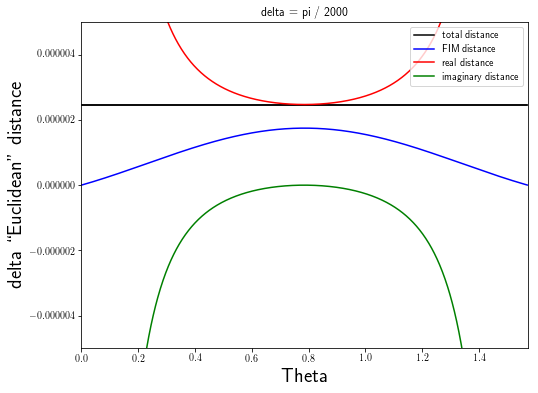

In [17]:
plt.figure(figsize=(8,6))
diffStart = 1
diffEnd = len(theta)-diffStart
xpoints = [theta[i] for i in range(diffStart,diffEnd)]
plt.plot(xpoints,[deR2[i]-deI2[i] for i in range(diffStart,diffEnd)],c='black',label='total distance')
plt.plot(xpoints,[dg[i] for i in range(diffStart,diffEnd)],c='blue',label='FIM distance')
plt.plot(xpoints,[de[i] for i in range(diffStart,diffEnd)],c='black')
plt.plot(xpoints,[deR2[i] for i in range(diffStart,diffEnd)],c='red',label='real distance')
plt.plot(xpoints,[-deI2[i] for i in range(diffStart,diffEnd)],c='green',label='imaginary distance')
plt.ylabel('delta ``Euclidean" distance',fontsize=20)
plt.xlabel('Theta',fontsize=20)
plt.title('delta = pi / '+str(2*len(theta)))
plt.xlim([0,np.pi/2])
plt.ylim([-0.000005,0.000005])
plt.legend(loc='upper right')

plt.show()